# Feature Engineering

## Introduction

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import sanity_checks_methods
import ML_algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()

In [2]:
print(df.dtypes)

sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [3]:
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22760,0.0,34.0,0,0,1,3,0,83.57,24.5,0,0
35865,0.0,48.0,1,0,1,2,1,69.94,33.3,1,0
24608,1.0,58.0,0,0,1,4,0,69.24,26.6,0,0
26877,1.0,25.0,0,0,0,2,1,160.76,30.2,1,0
29623,1.0,51.0,0,0,0,4,1,80.55,23.5,1,0
29557,0.0,90.0,0,0,1,4,0,207.84,38.9,0,0
38083,1.0,47.0,1,0,1,3,1,107.21,27.0,1,0
24646,1.0,69.0,0,1,1,4,1,208.05,35.3,1,0
30964,1.0,21.0,1,0,0,4,1,71.22,40.0,0,0
33339,0.0,25.0,0,0,1,2,0,97.40,44.6,1,0


In [4]:
num_features = df.shape[1]
num_data_points = df.shape[0]

print("Number of features in the dataset: ", num_features)
print("Number of data in dataset: ", num_data_points)

Number of features in the dataset:  11
Number of data in dataset:  9999


## Sanity checks

In [5]:
sanity_checks_methods.max_min_commonValue(df)

BMI
min value:14.1
max value: 78.0
max common value: 31.4

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39



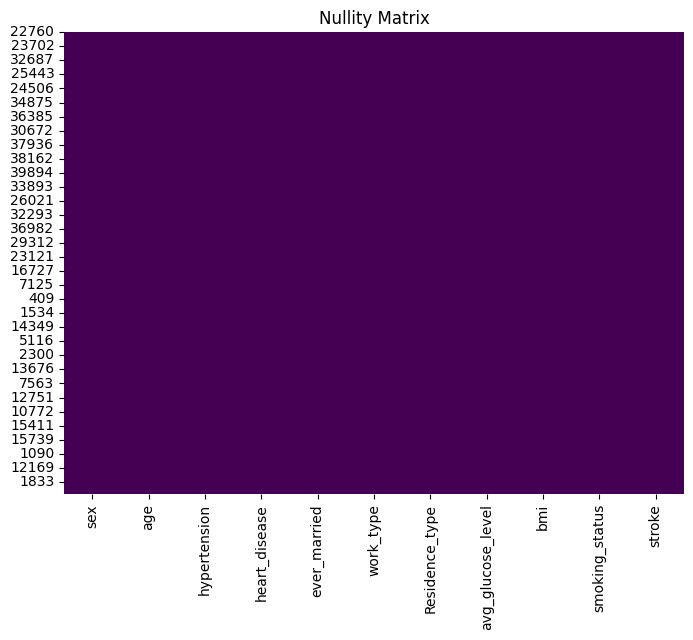

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Matrix')
plt.show()

**Print duplicates and null values**

In [7]:
sanity_checks_methods.print_null_values(df)
sanity_checks_methods.print_duplicates_values(df)

total rows: 9999
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Count: 0
Null Percentage: 0.00%

Feature: Residence_type
Null Count: 0
N

### Checking categorical features values

In [8]:
sanity_checks_methods.check_categorical_values(df)

All values are correct


Checking negative values for features BMI, Age and glucose level

In [9]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

**Checking consistency in age and ever_married feature**

In [10]:
sanity_checks_methods.check_age_married_consistency(df)

number of incosistencies: 

423


**consistency check between age and work_type feature**

In [11]:
sanity_checks_methods.check_age_workType_consistency(df)

number of incosistencies: 

487
Rows with age < 16 and work_type different from 0 or 1 dropped


**dropping null**

In [12]:
df = df.dropna()
df = df[df['sex'] >= 0]

**visualizing outliers using z-score**

no outliers detected for feature age
no outliers detected for feature avg_glucose_level

 outliers detected for frature bmi


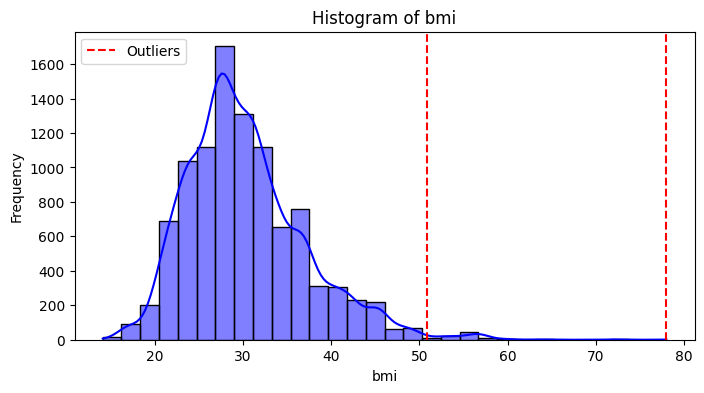

In [13]:
sanity_checks_methods.visualize_outliers(df)

## EDA ON ORIGINAL DATASET

### Categorical features frequencies

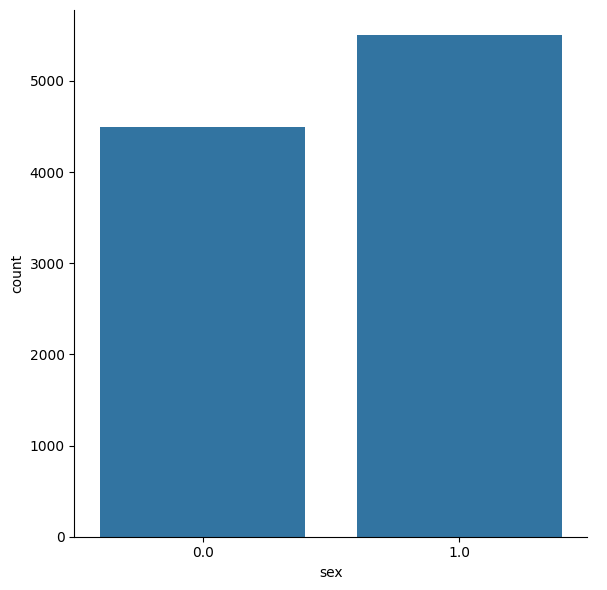

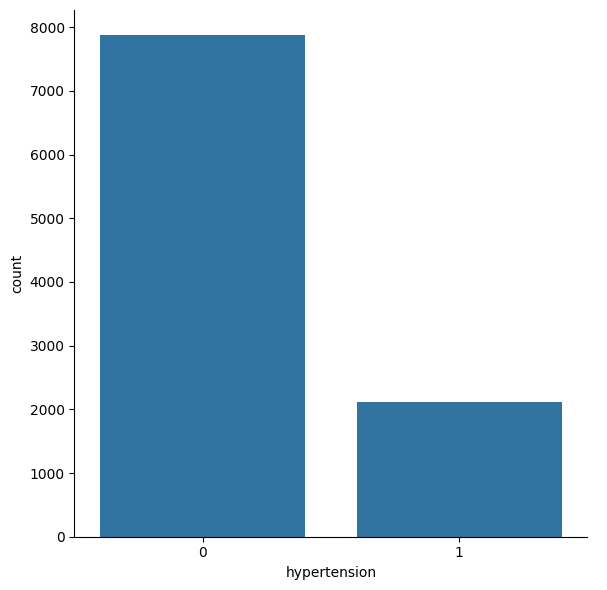

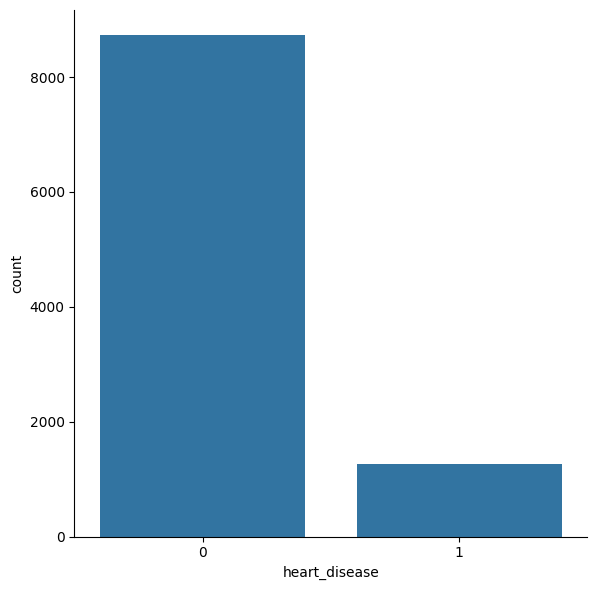

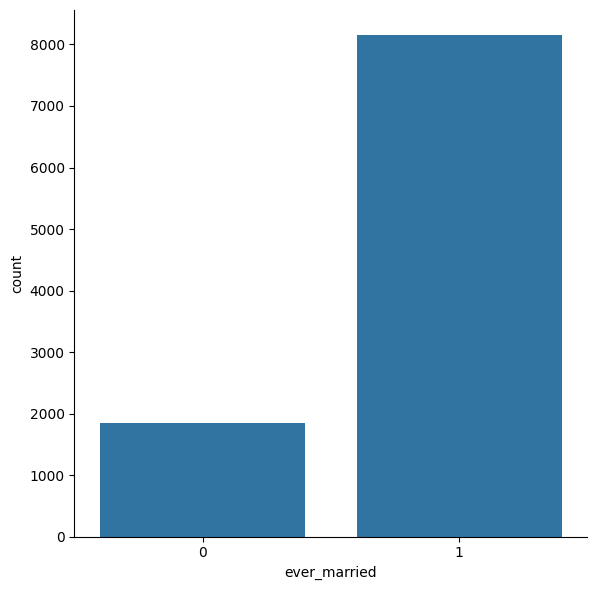

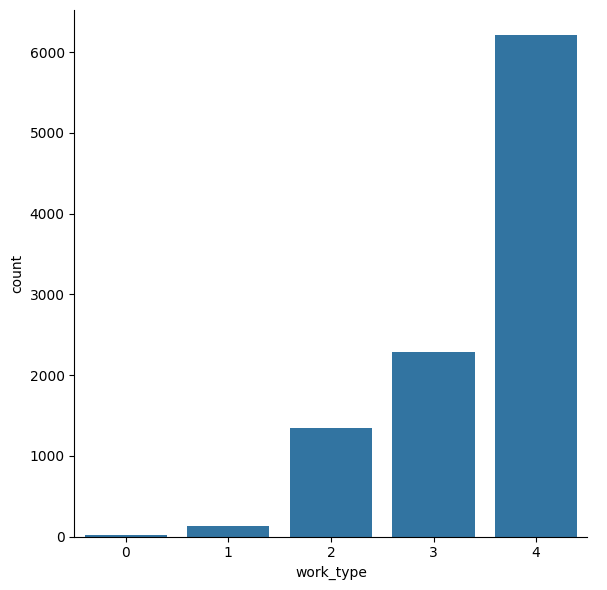

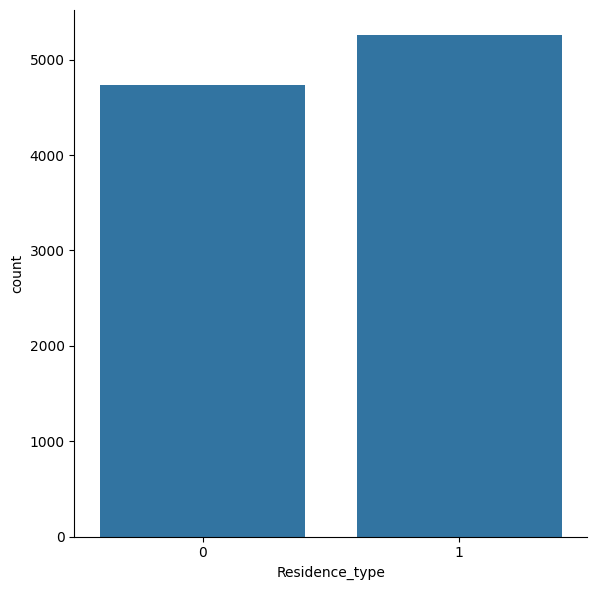

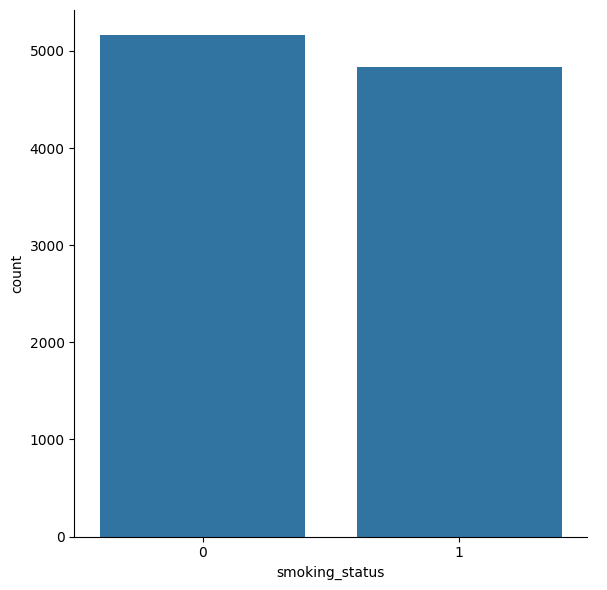

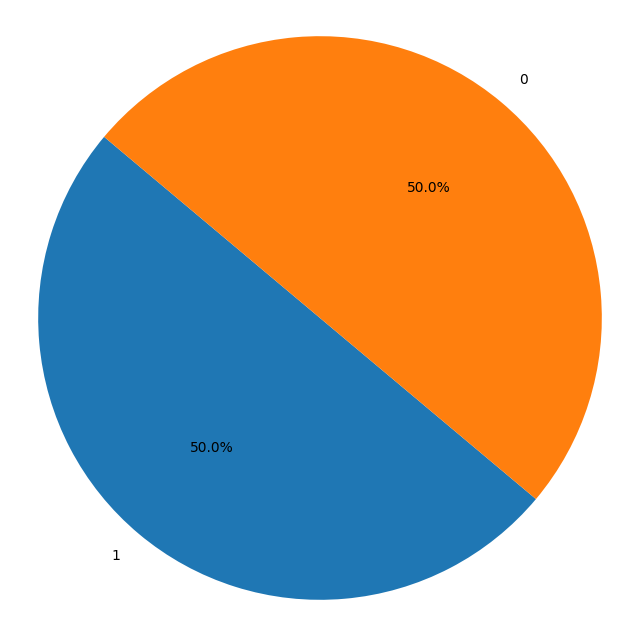

In [14]:
categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()

### Numerical features distribution

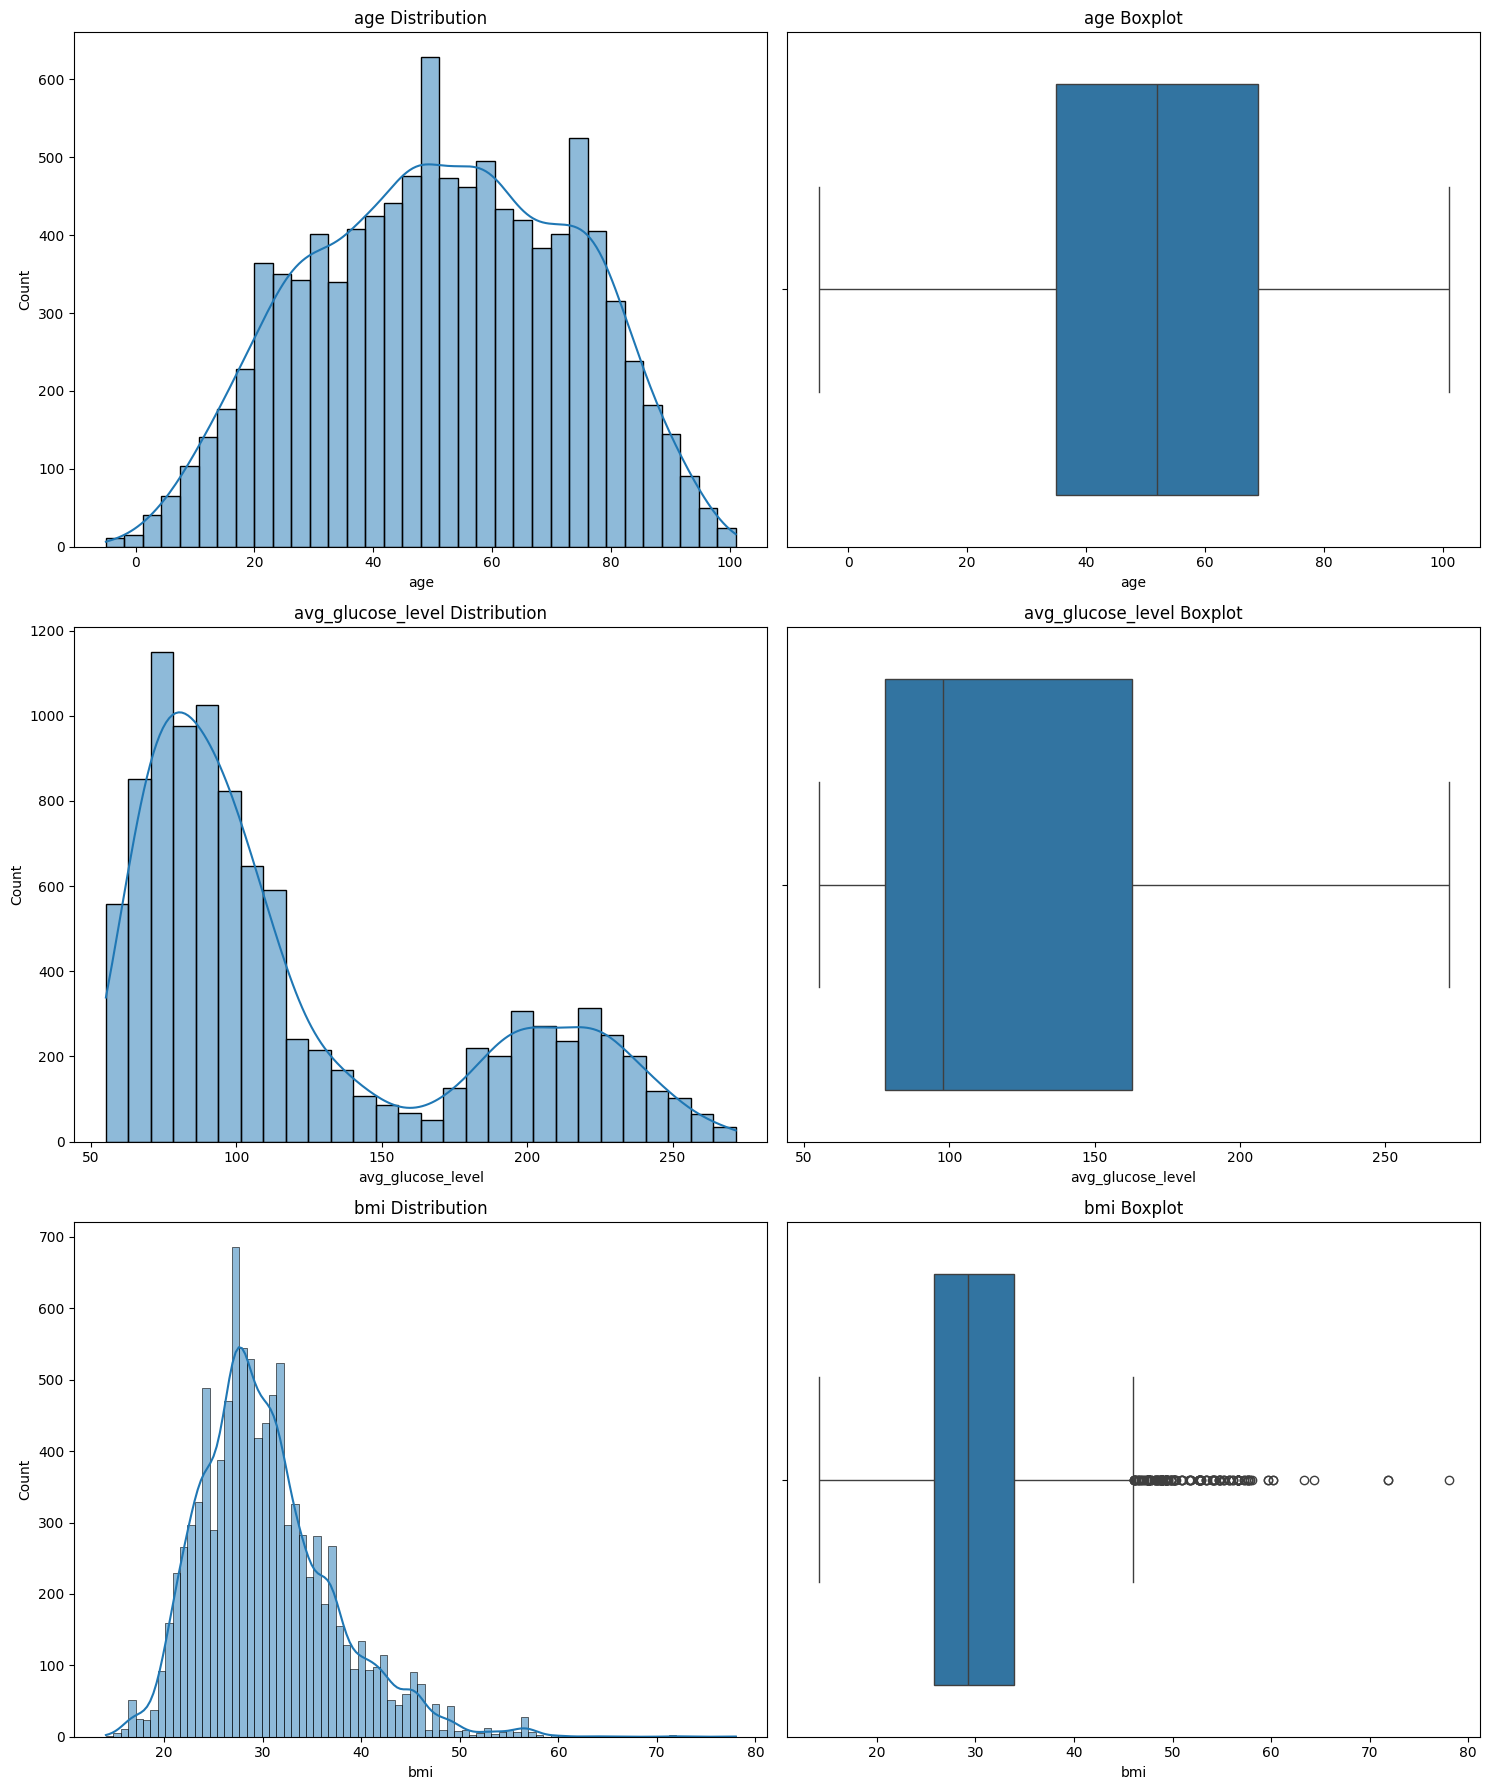

In [15]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


**Correlation matrix**

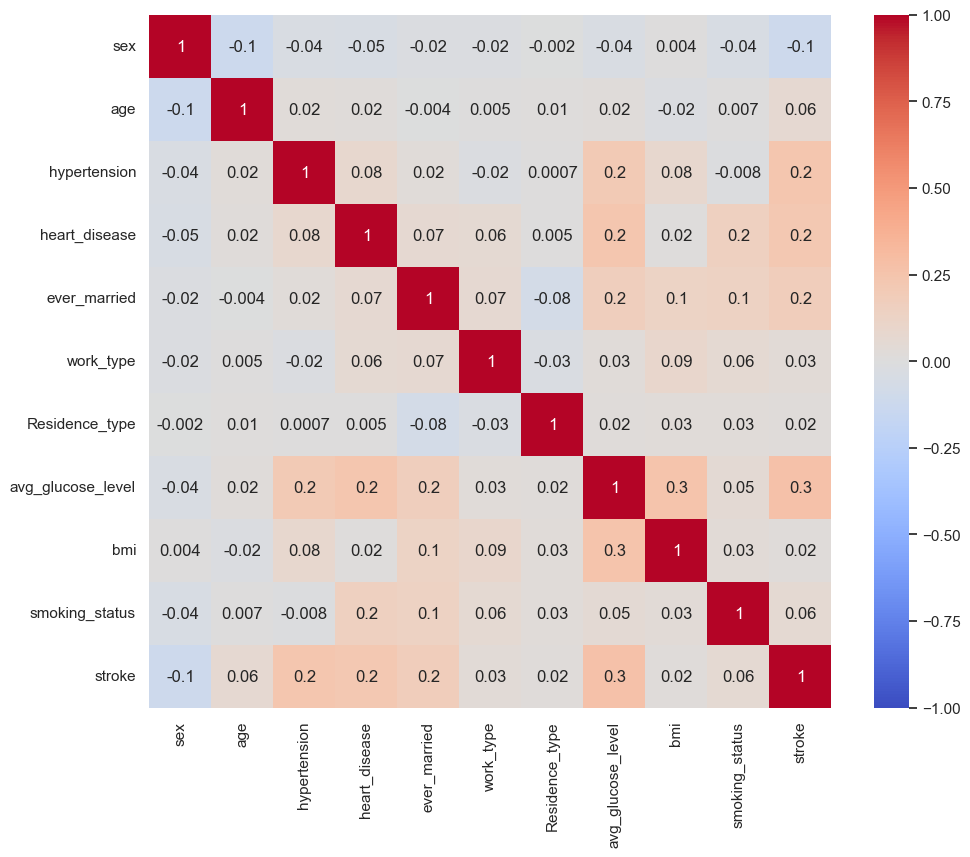

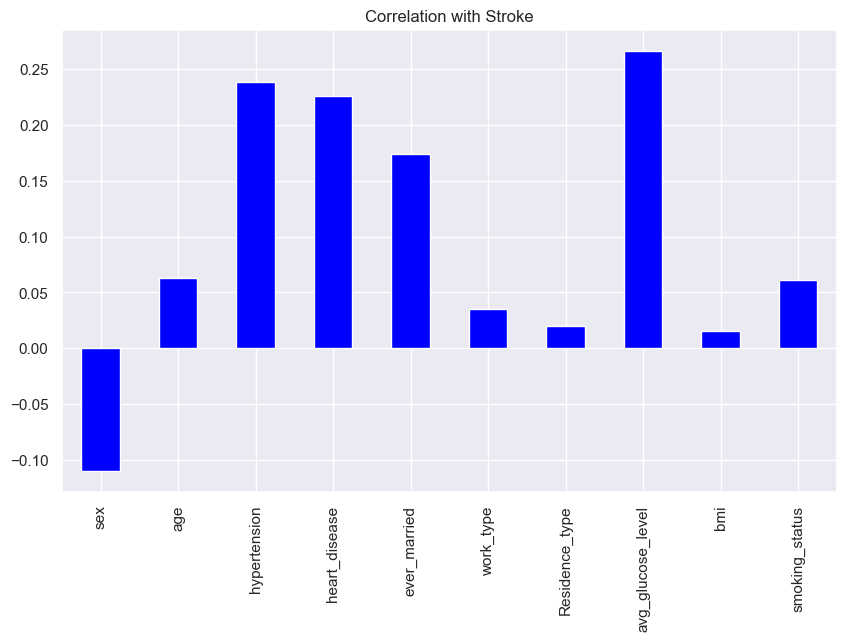

In [16]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

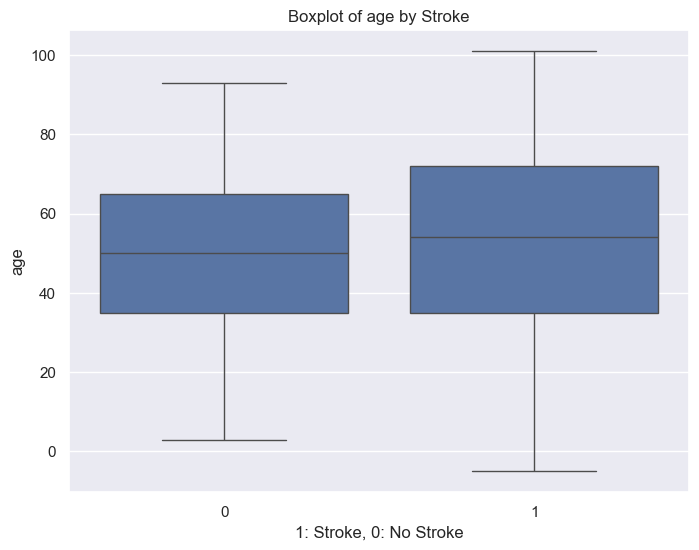

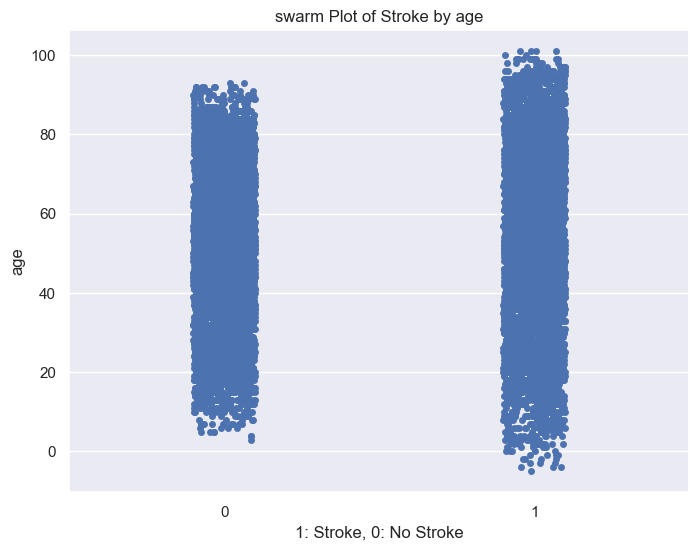

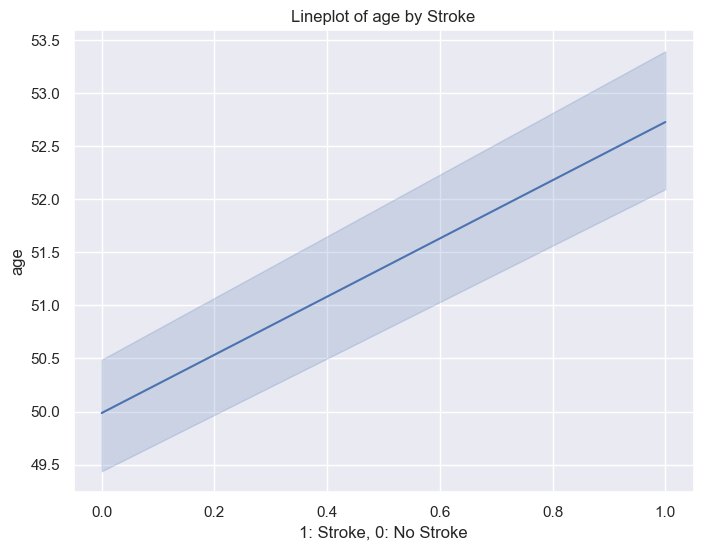

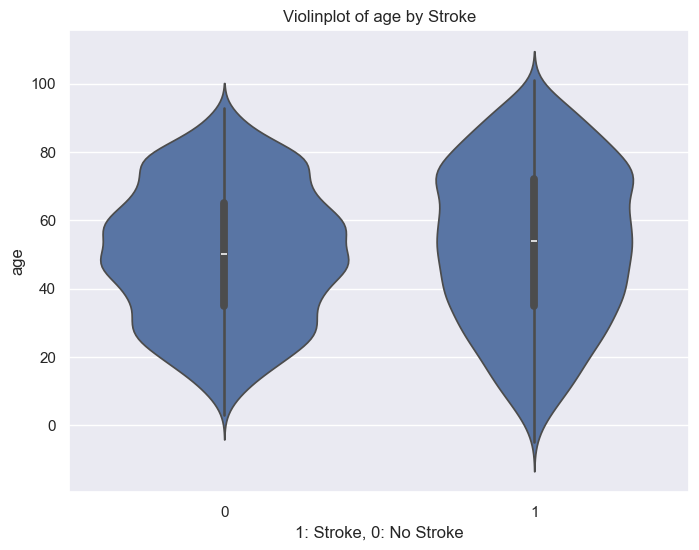

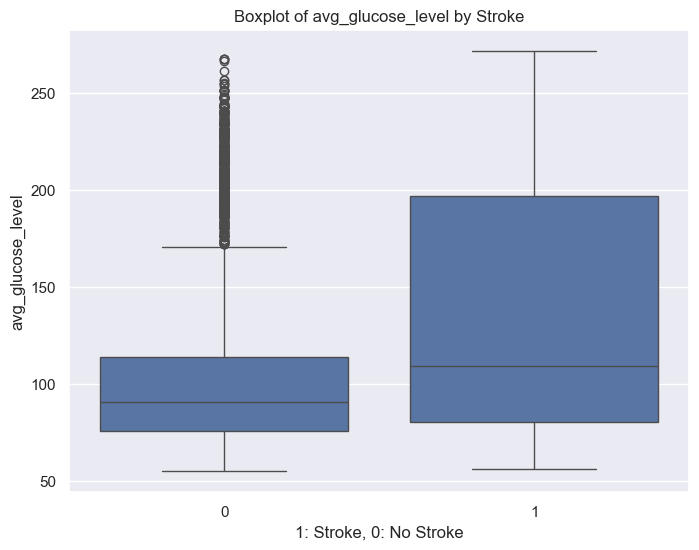

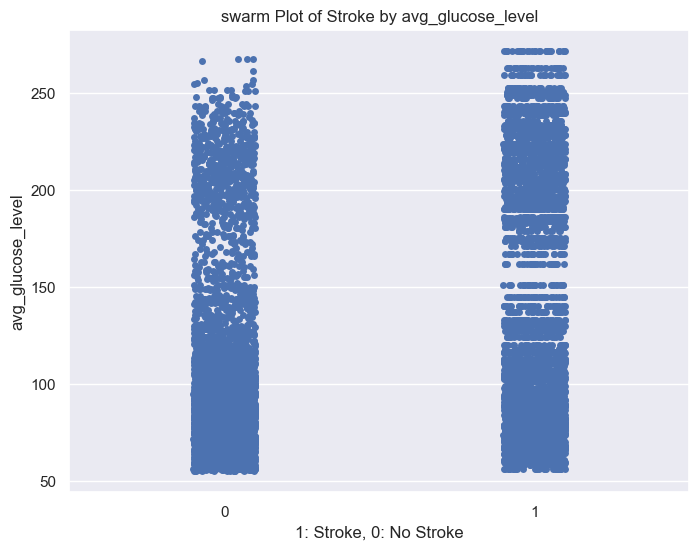

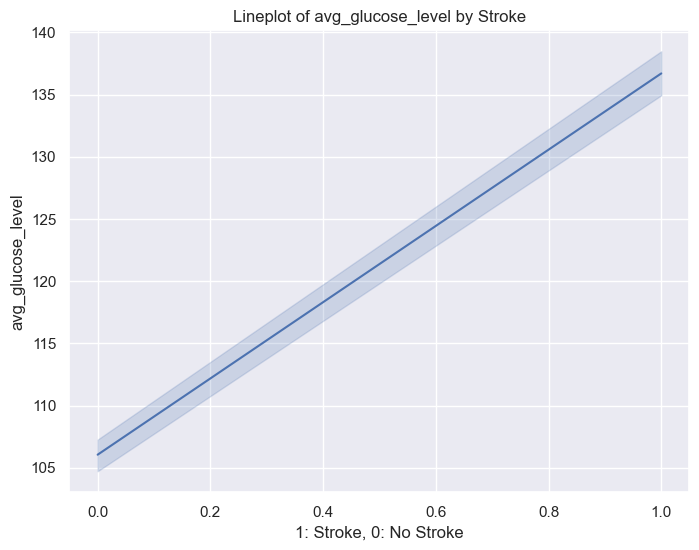

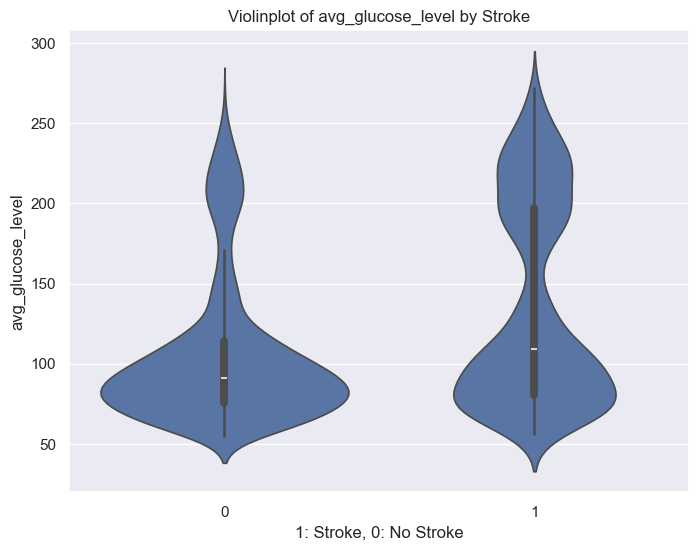

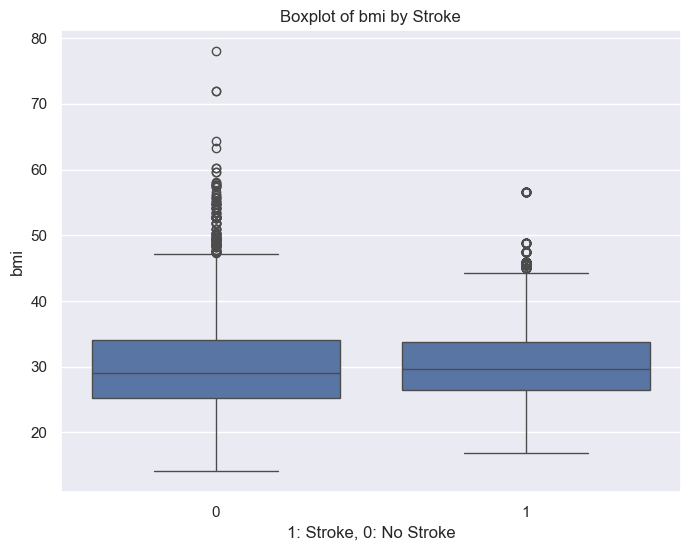

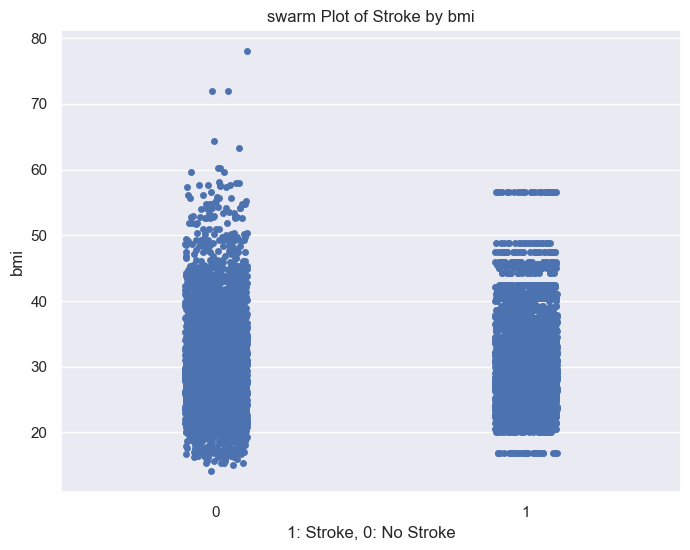

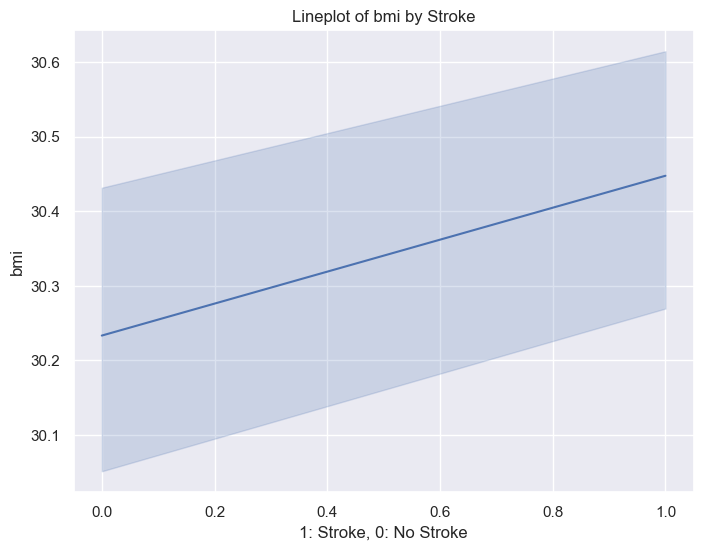

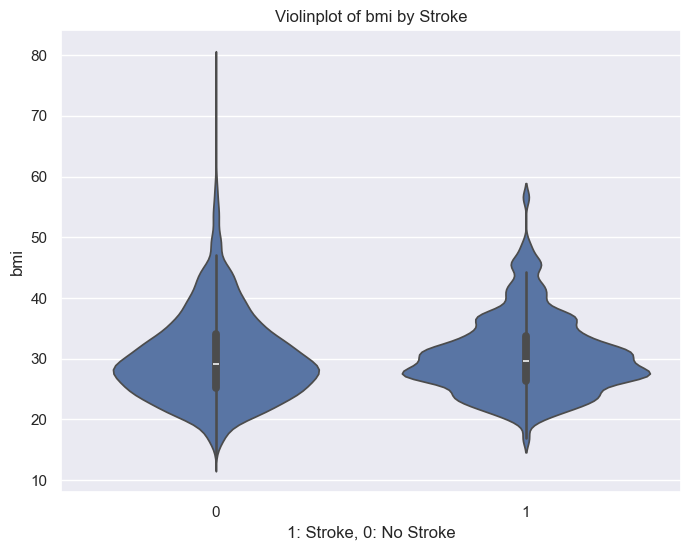

In [17]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

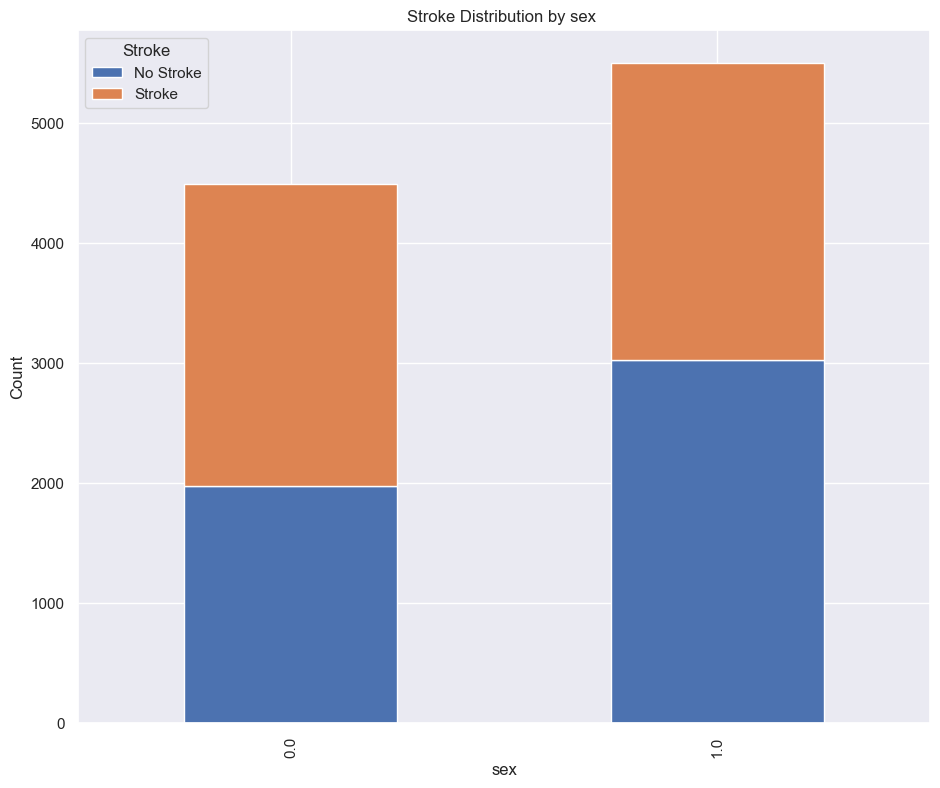

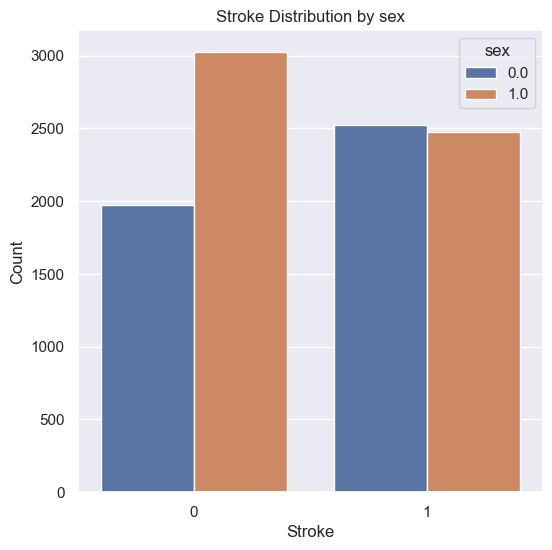

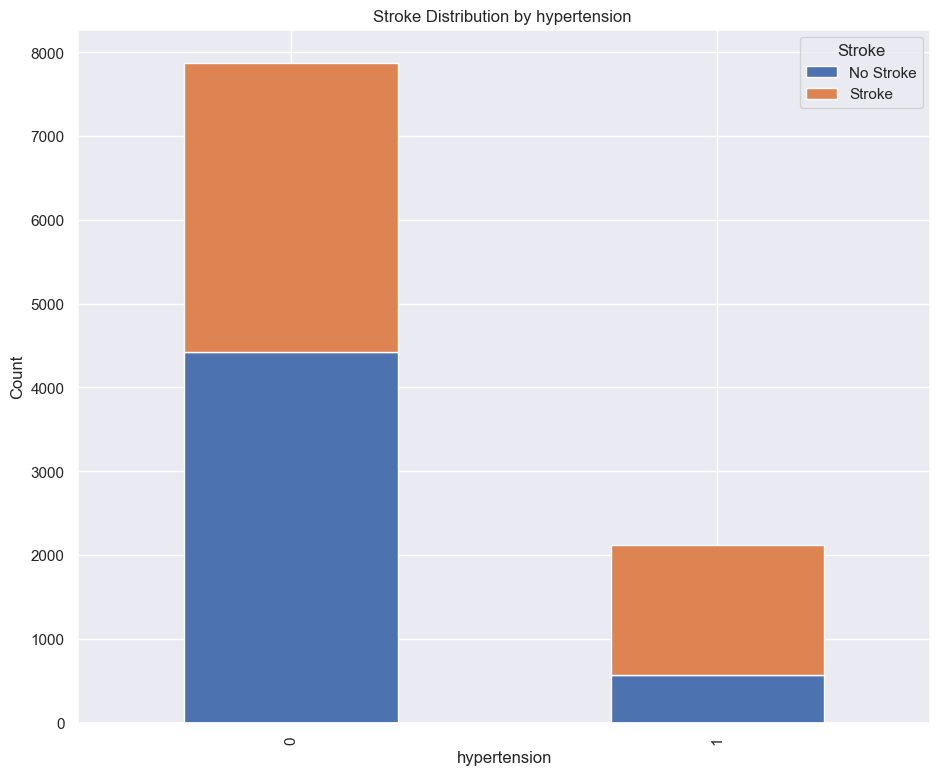

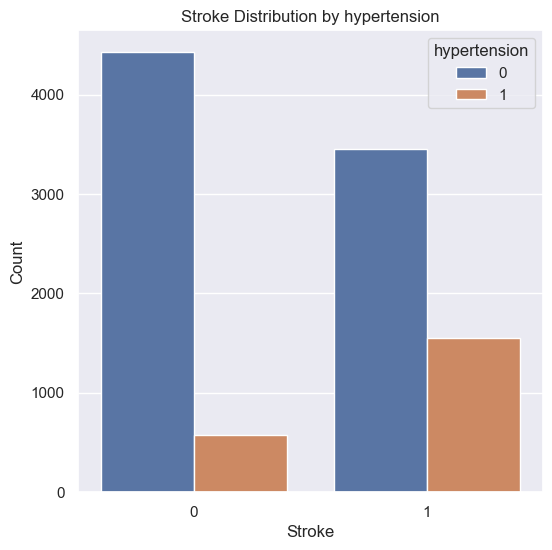

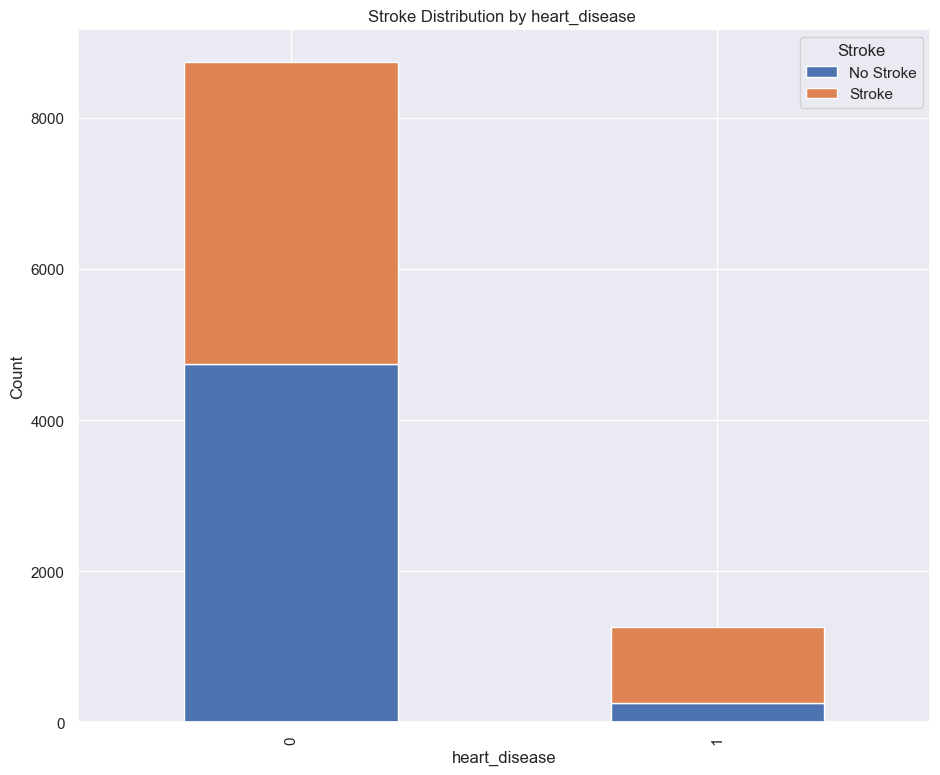

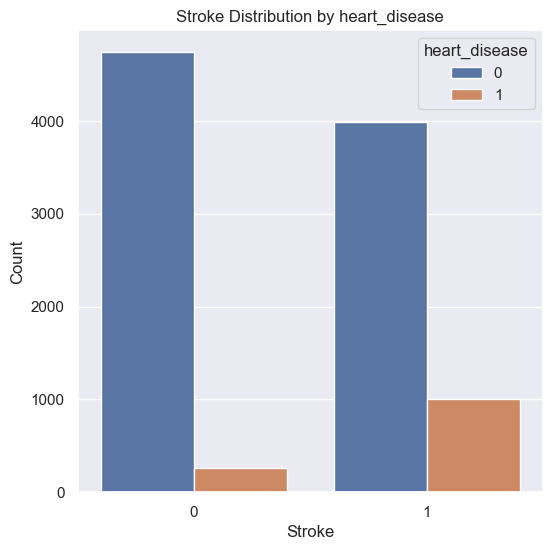

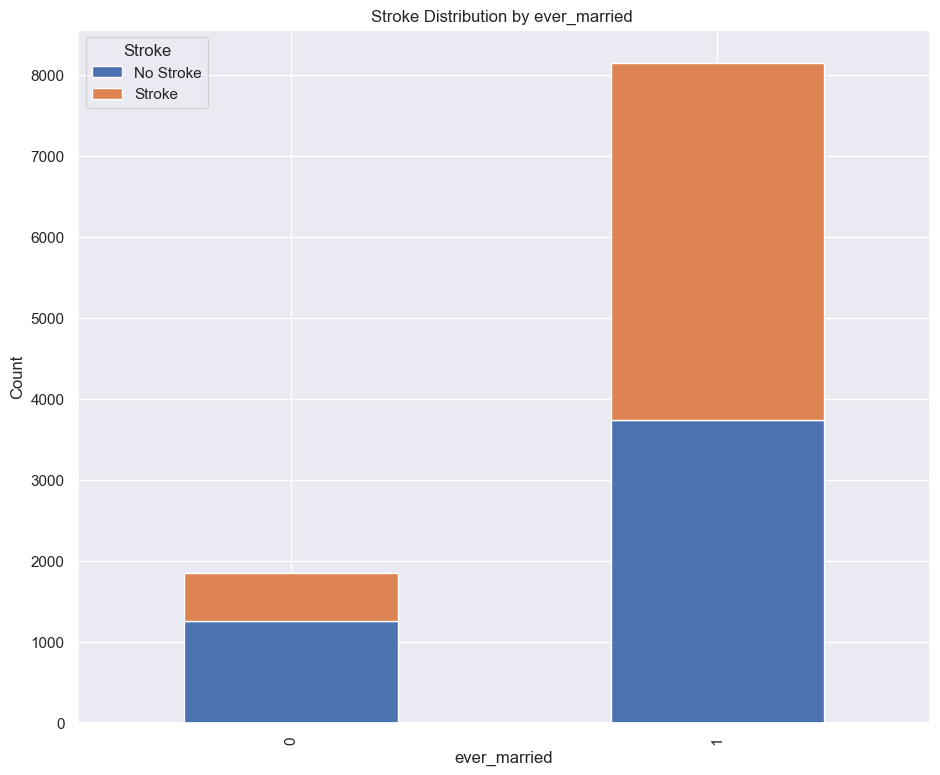

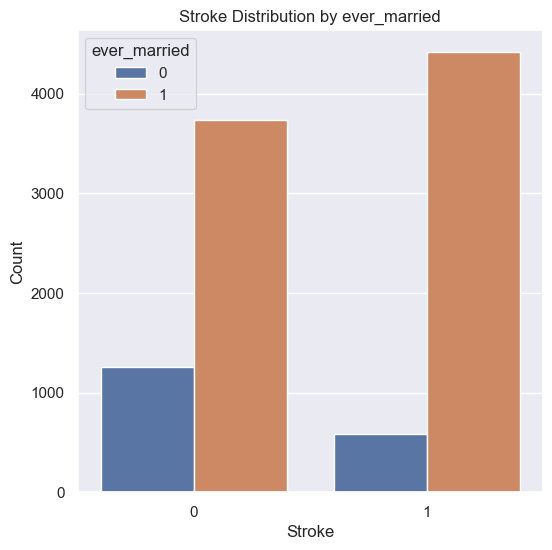

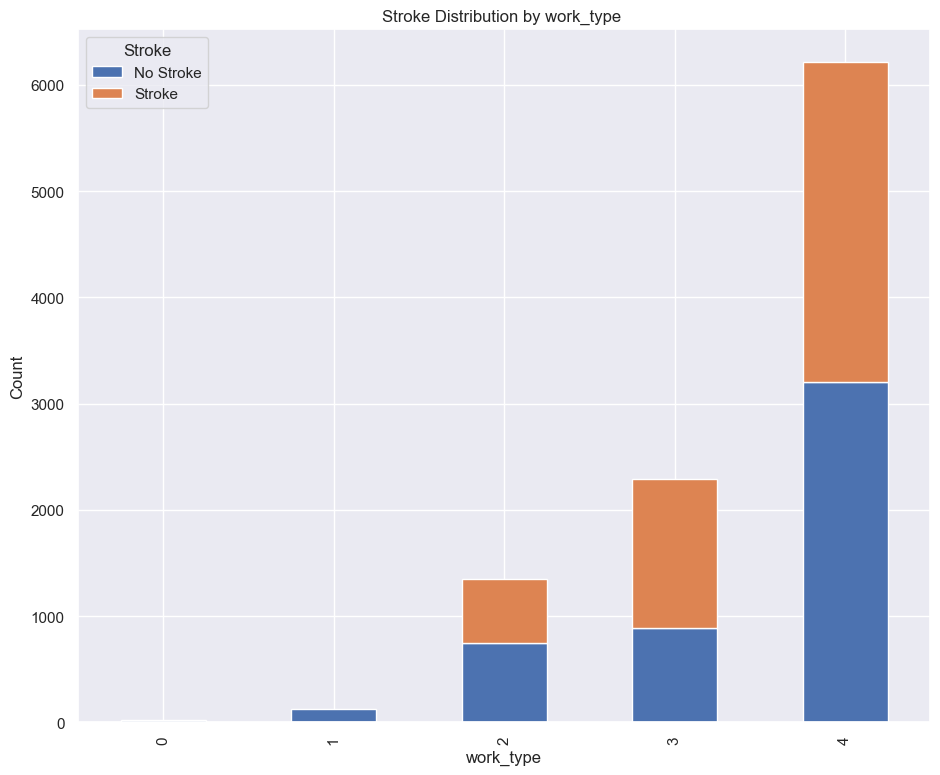

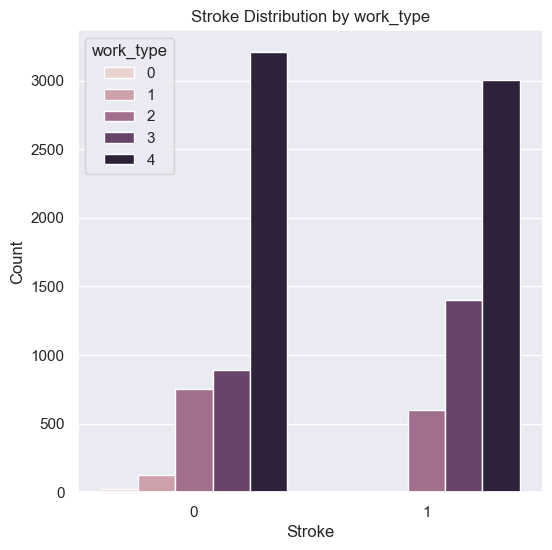

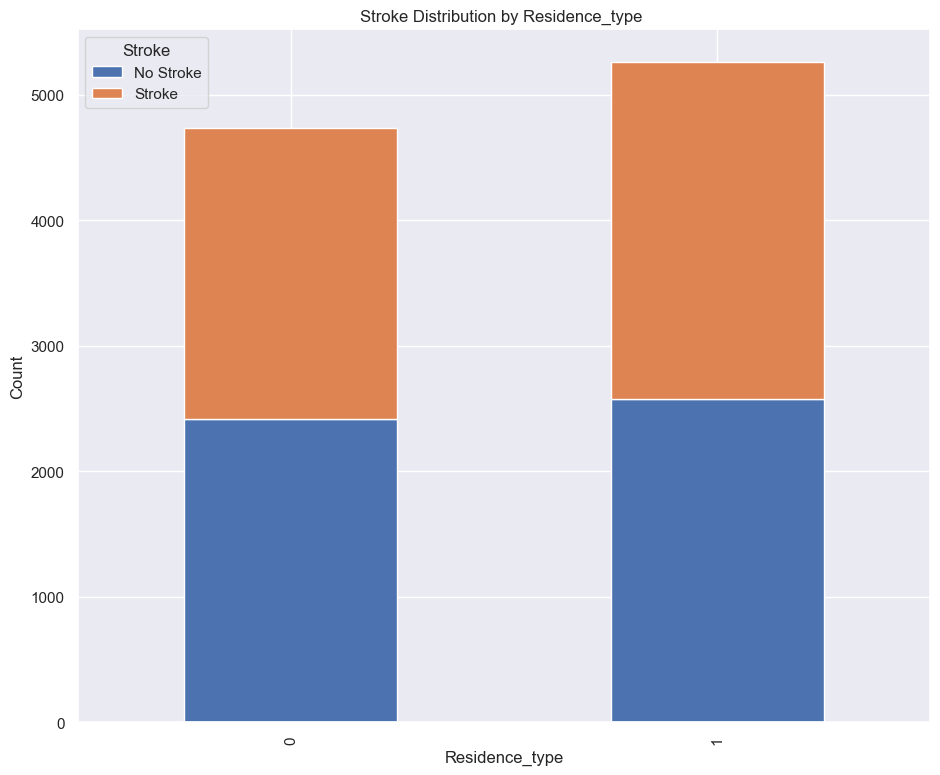

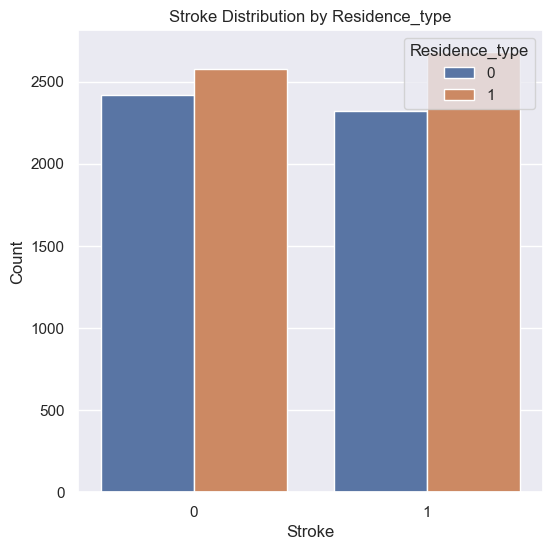

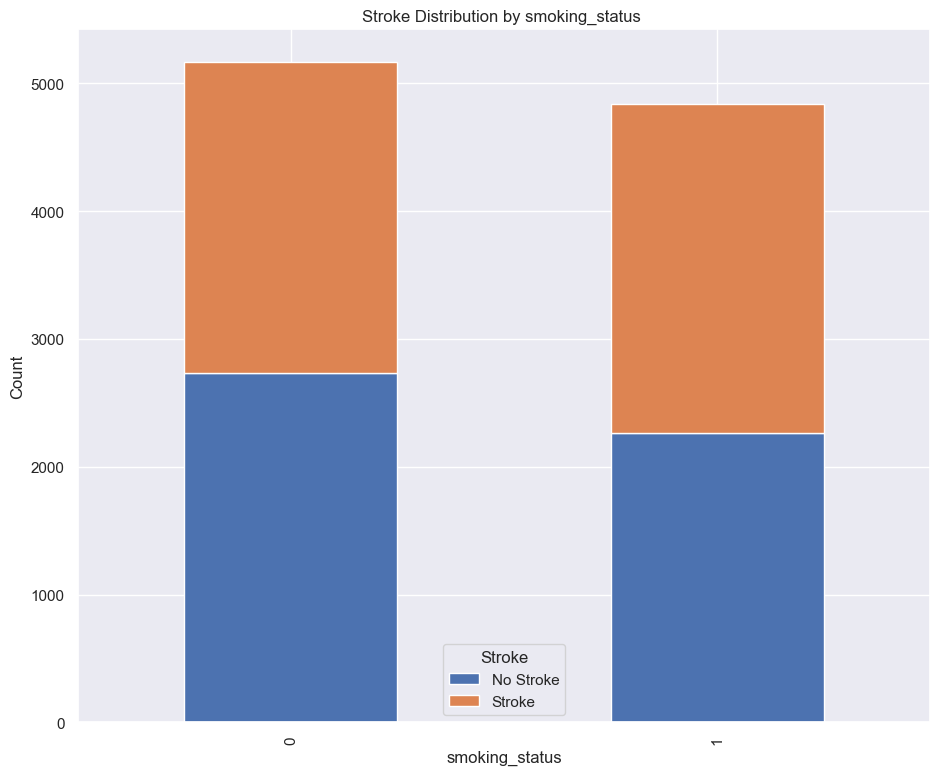

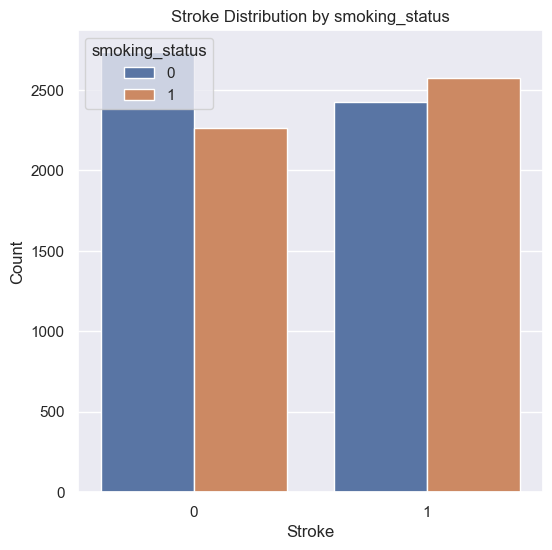

In [18]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        ##print_piechart(column)

print_plots()

## Models


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1548
           1       0.81      0.93      0.86      1452

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.87      0.86      0.86      3000

Node Labels:
 Annotation(0.651616, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6999\nvalue = [3451, 3548]\nclass = 1')


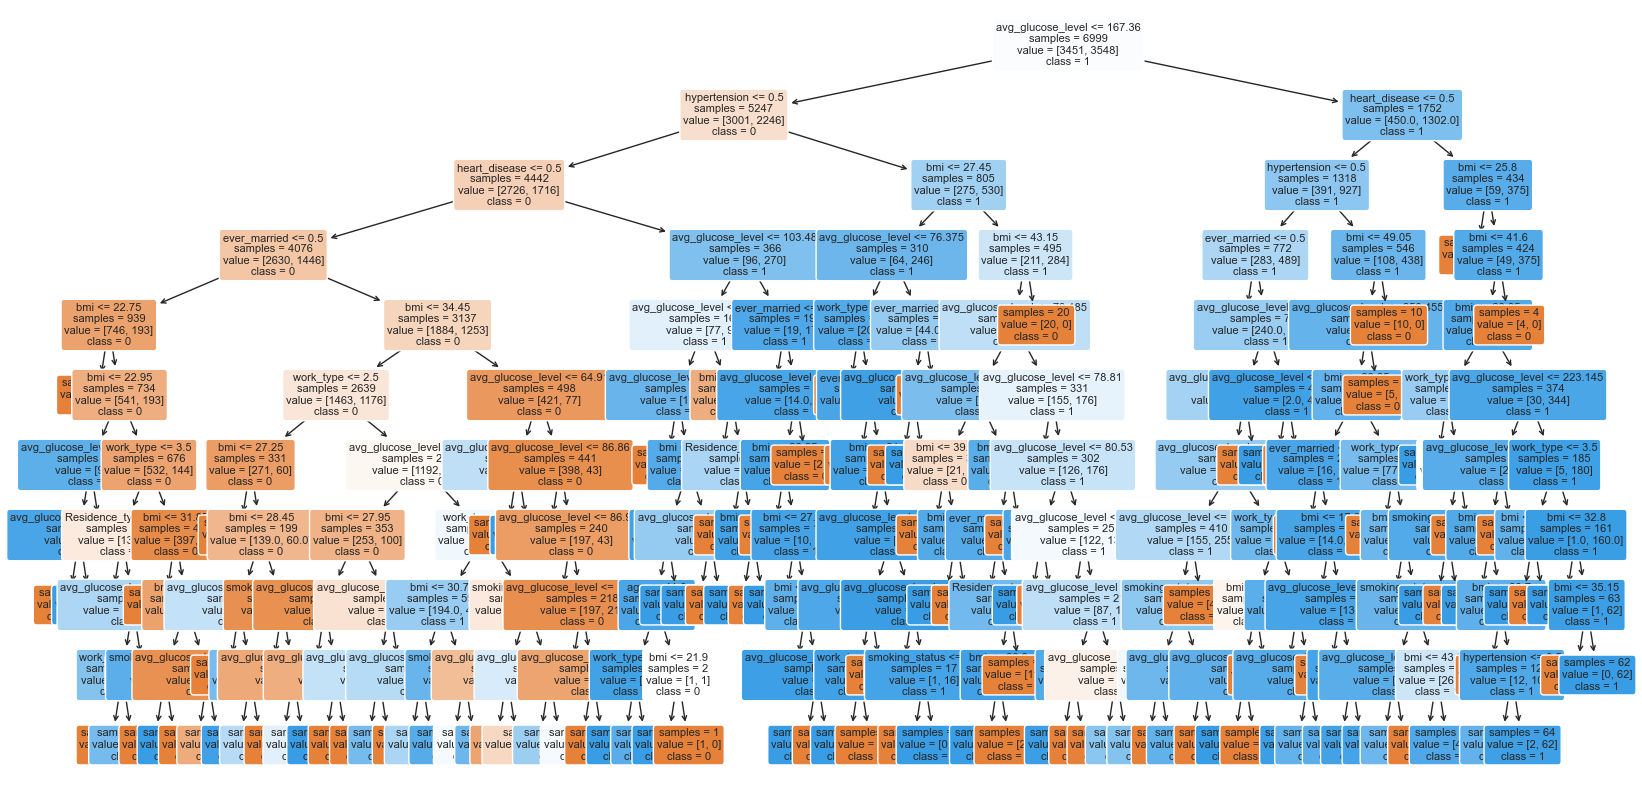

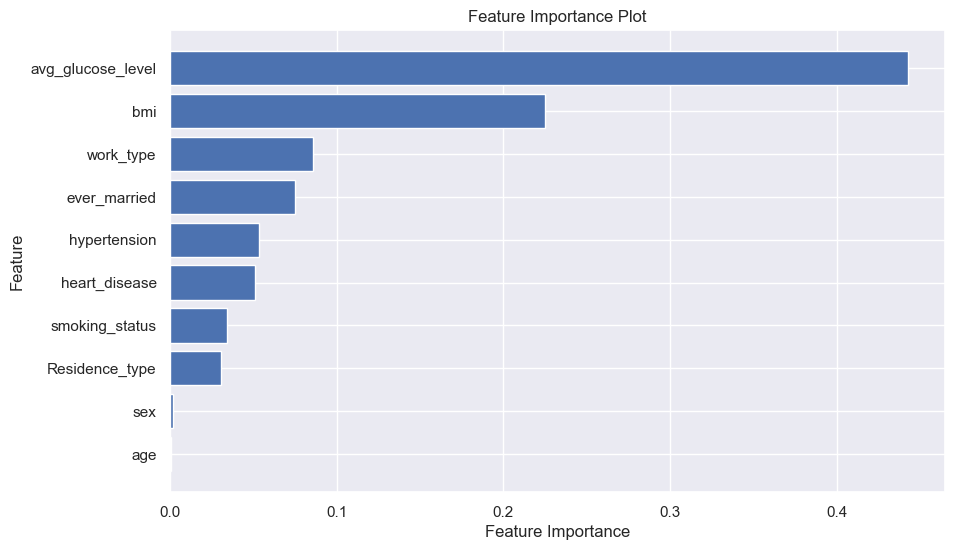

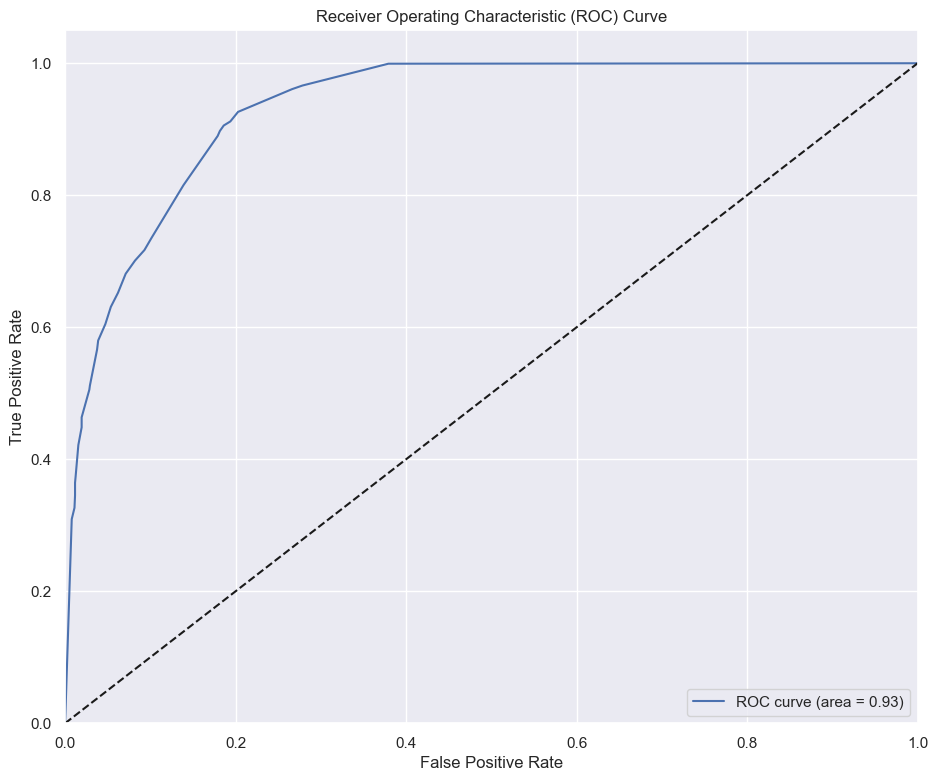

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9336146881072885
Accuracy for each fold: [0.82, 0.81, 0.8466666666666667, 0.8433333333333334, 0.81, 0.8233333333333334, 0.8166666666666667, 0.7766666666666666, 0.8133333333333334, 0.8133333333333334]
Mean accuracy: 0.8173333333333334
95% confidence interval: (0.8034839272893698, 0.8311827393772969)


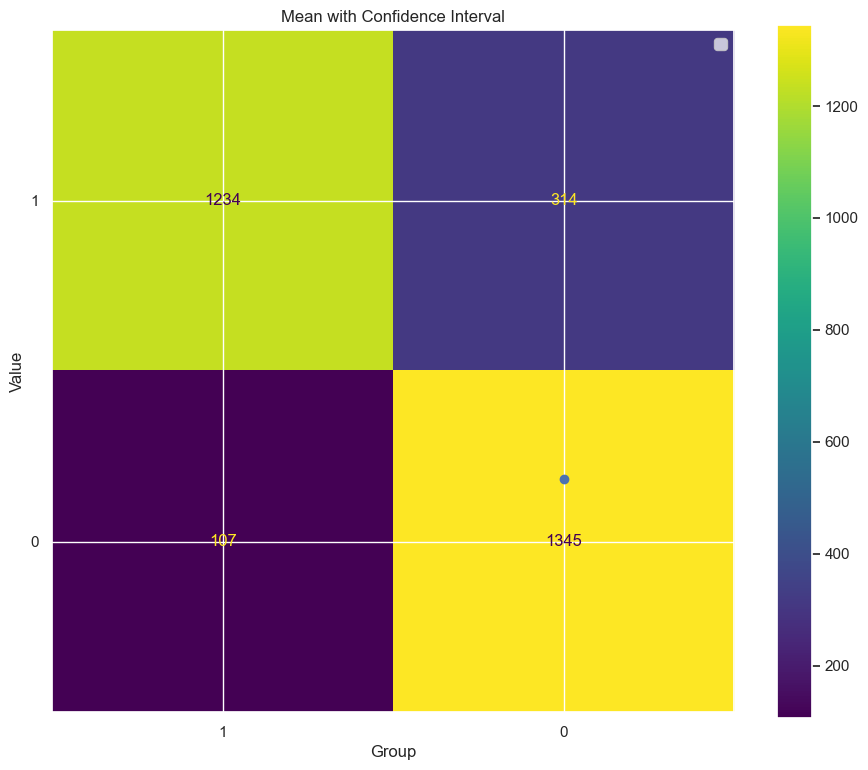


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1548
           1       0.71      0.59      0.65      1452

    accuracy                           0.69      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.69      0.68      3000



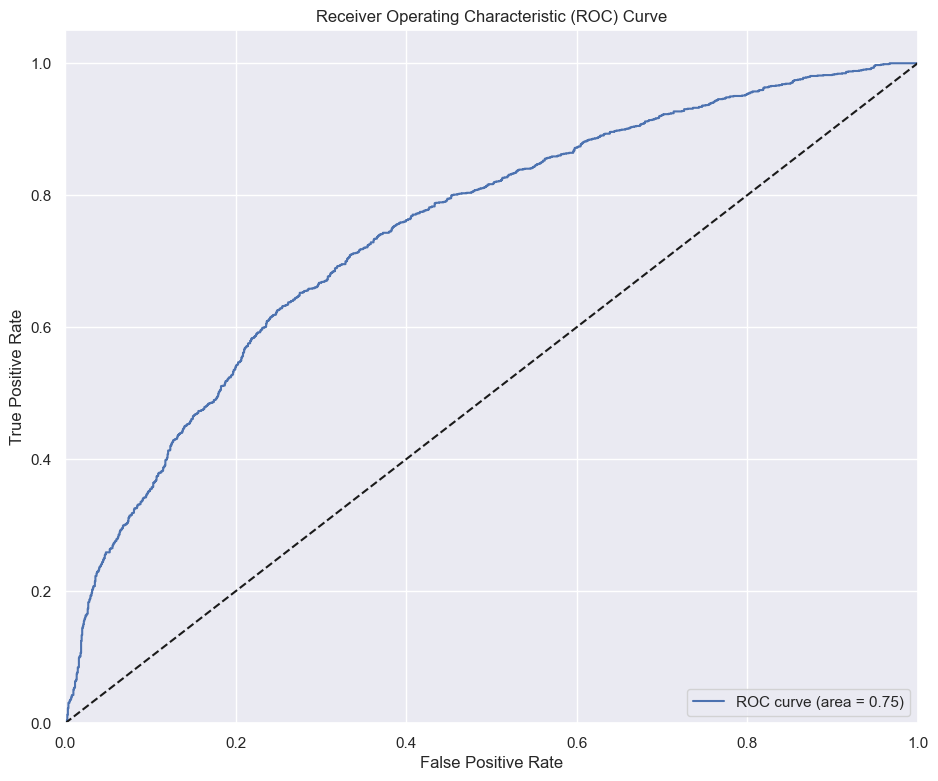

AUC Score: 0.7455229710779394


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.67, 0.69, 0.68, 0.7333333333333333, 0.7266666666666667, 0.6766666666666666, 0.7233333333333334, 0.7066666666666667, 0.72, 0.68]
Mean accuracy: 0.7006666666666667
95% confidence interval: (0.6835526489061319, 0.7177806844272014)


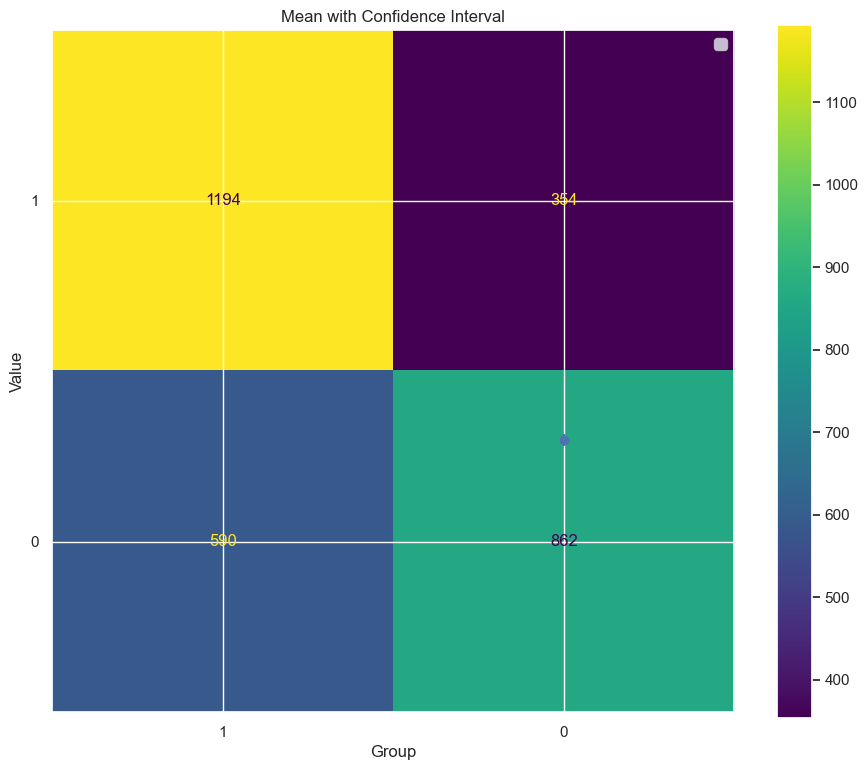

In [19]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 